<div style="color: WHITE; background-color:RED; text-align: center;">
    <h1>CUSTOMER ANALYSIS</h1>
</div>

<div style="color:BLUE;">1. Introduction </div>

understanding your customers is not merely a competitive advantage; it's the heartbeat of successful marketing and business strategy. Customer segmentation, the art of classifying diverse customer bases into meaningful groups, holds the key to unlocking targeted marketing, enhanced customer experiences, and sustainable growth. This documentary report serves as a comprehensive guide to the fundamentals of customer segmentation, offering insights into the world of customer analysis, data sources, the strategic significance, and two pivotal segmentation approaches.

<div style="color:BLUE;">2.Customer Analysis </div>

Customer analysis refers to the process of gathering and evaluating data about a company's customers to gain a comprehensive understanding of their behavior, preferences, needs, and characteristics. This strategic practice allows businesses to segment their customer base, create detailed customer profiles, and extract valuable insights that drive decision-making, marketing strategies, product development, and customer engagement initiatives.

<div style="color: RED; background-color:WHITE; text-align: left;">
    <h1>Table Of Contents</h1>
</div>


<div style="color:red;">

1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA CLEANING

4. DATA PREPROCESSING

5. DIMENSIONALITY REDUCTION

6. CLUSTERING

7. CLASSIFICATION

8. CONCLUSION

    

    
    </div>


<div style="color: BLACK; background-color:white; text-align: left;">
    <h1>Importing Libraries</h1>
</div>

In [131]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="color: PURPLE; background-color:white; text-align: left;">
    <h1>Training Dataset</h1>
</div>

<div style="color: GREEN; background-color:white; text-align: left;">
    <h1>Loading Data</h1>
</div>

In [132]:
df = pd.read_csv('customer_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [133]:
print("Number of datapoints:", len(df))

Number of datapoints: 1680


In [134]:
df.dtypes.value_counts()

int64      27
object      3
float64     1
Name: count, dtype: int64

<div style="color: GREEN; background-color:white; text-align: left;">
    <h1>Data Cleaning</h1>
</div>

In this section

* Data Cleaning
* Feature Engineering

In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

In [135]:
df.shape

(1680, 31)

In [136]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [199]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [200]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [201]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [202]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

<Axes: >

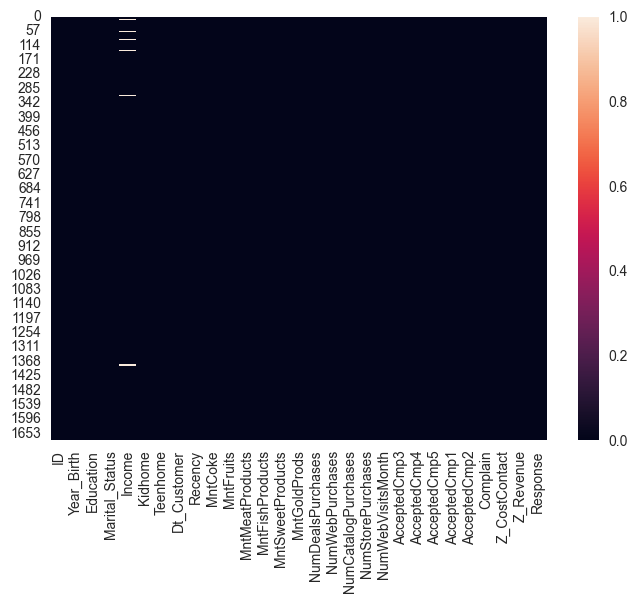

In [203]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

* 1) There are missing values in income column.
* 2) Dt_Customer(date of costumer joined) is not in date time format.

In [204]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [205]:
df.Marital_Status.unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [206]:
# use the replace method to convert Indonesian to English
df['Marital_Status'].replace({'Lajang': 'Single', 
                              'Bertunangan': 'Engaged', 
                              'Menikah': 'Married', 
                              'Cerai': ' Divorced', 
                              'Janda': 'Widow', 
                              'Duda': 'Widower'}, inplace=True)

In [207]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


*  Now we will deal with Dt_Custumer feature

In [208]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,2012-09-04,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,2014-03-08,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,2014-02-10,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Engaged,20193000.0,0,0,2012-11-28,18,8000,...,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,S1,Married,27573000.0,1,0,2013-03-25,45,50000,...,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,SMA,Single,15862000.0,1,0,2013-06-27,26,1000,...,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,S3,Married,49544000.0,1,0,2013-02-12,0,308000,...,7,0,0,0,0,0,0,3,11,0


<div style="color: GREEN; background-color:white; text-align: left;">
    <h1>Feature Engineering</h1>
</div>

In [209]:
#CategoricaL

df["Marital_Status"].value_counts()

Marital_Status
Married      650
Engaged      438
Single       360
 Divorced    177
Widow         52
Widower        3
Name: count, dtype: int64

From the above output, we can conclude and note that:

There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

* First of all, for the missing values, First check the outlier in the income column

In [210]:
income_column = df['Income']

# Calculate the IQR (Interquartile Range)
Q1 = income_column.quantile(0.25)
Q3 = income_column.quantile(0.75)
IQR = Q3 - Q1

# Define a lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(income_column < lower_bound) | (income_column > upper_bound)]

# Display only the 'Income' column of the outliers
outlier_incomes = outliers['Income']

# Display the outlier incomes
print("Outliers in the Income column:")
print(outlier_incomes)

Outliers in the Income column:
164     157243000.0
617     162397000.0
655     153924000.0
687     160803000.0
1300    157733000.0
1653    157146000.0
Name: Income, dtype: float64


Removing the outliers from income column.

In [211]:
# Remove outliers by filtering the DataFrame
df_no_outliers = df[(income_column >= lower_bound) & (income_column <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers['Income'])

DataFrame without outliers:
0       58138000.0
1       46344000.0
2       71613000.0
3       26646000.0
4       58293000.0
           ...    
1675    20193000.0
1676    27573000.0
1677    15862000.0
1678    49544000.0
1679    33228000.0
Name: Income, Length: 1674, dtype: float64


In the next bit, I will be performing the following steps to engineer some new features:

1)Creating Age column from Year_Birth column.

2)Creating Total_Kids column from Kidhome and Teenhome columns.

3)Creating Total_Mnt column from MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts and MntGoldProds columns.

4)Creating Total_Purchases column from NumWebPurchases,NumCatalogPurchases and NumStorePurchases columns.

6)Droping Z_CostContact,Z_Revenue,ID,Year_Birth.

In [212]:
# 1)Creating Age column from Year_Birth column.
df["Age"] = 2023 - df["Year_Birth"]

In [213]:
# 2)Creating Total_Kids column from Kidhome and Teenhome columns.
df["Total_kids"] = df["Kidhome"] + df["Teenhome"]

In [214]:
# 3)Creating Total_Mnt column from MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts and MntGoldProds columns.
df["Total_Mnt"] = df["MntCoke"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [215]:
# 4)Creating Total_Purchases column from NumWebPurchases,NumCatalogPurchases and NumStorePurchases columns.
df["Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [216]:
# 5)Droping Z_CostContact,Z_Revenue,ID,Year_Birth.
df.drop(["Z_CostContact","Z_Revenue","ID","Year_Birth"],axis=1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,S1,Single,58138000.0,0,0,2012-09-04,58,635000,88000,546000,...,0,0,0,0,0,1,66,0,1617000,22
1,S1,Single,46344000.0,1,1,2014-03-08,38,11000,1000,6000,...,0,0,0,0,0,0,69,2,27000,4
2,S1,Engaged,71613000.0,0,0,2013-08-21,26,426000,49000,127000,...,0,0,0,0,0,0,58,0,776000,20
3,S1,Engaged,26646000.0,1,0,2014-02-10,26,11000,4000,20000,...,0,0,0,0,0,0,39,1,53000,6
4,S3,Married,58293000.0,1,0,2014-01-19,94,173000,43000,118000,...,0,0,0,0,0,0,42,1,422000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,D3,Engaged,20193000.0,0,0,2012-11-28,18,8000,8000,22000,...,0,0,0,0,0,0,32,0,82000,6
1676,S1,Married,27573000.0,1,0,2013-03-25,45,50000,15000,110000,...,0,0,0,0,0,0,48,1,244000,10
1677,SMA,Single,15862000.0,1,0,2013-06-27,26,1000,1000,4000,...,0,0,0,0,0,0,44,1,36000,4
1678,S3,Married,49544000.0,1,0,2013-02-12,0,308000,0,73000,...,0,0,0,0,0,0,47,1,404000,14


In [217]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_kids,Total_Mnt,Total_Purchases
count,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680,1680.000000,1.680000e+03,1680.000000,1.680000e+03,...,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.00000
mean,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,2013-07-11 04:42:51.428571392,49.083333,3.048994e+05,25918.452381,1.657738e+05,...,0.062500,0.011905,0.010119,3.0,11.0,0.144048,54.152381,0.952381,6.039030e+05,12.50119
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,1.000000e+03,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,0.000000,5.000000e+03,0.00000
25%,2823.250000,1960.000000,3.579075e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.400000e+04,1000.000000,1.600000e+04,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,0.000000,6.900000e+04,6.00000
50%,5381.000000,1970.000000,5.144550e+07,0.000000,0.000000,2013-07-11 00:00:00,50.000000,1.730000e+05,8000.000000,6.800000e+04,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,1.000000,3.915000e+05,12.00000
75%,8370.750000,1977.000000,6.789750e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,4.942500e+05,32000.000000,2.322500e+05,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,1.000000,1.035500e+06,18.00000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.492000e+06,199000.000000,1.725000e+06,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,3.000000,2.525000e+06,32.00000
std,3238.155703,12.027192,2.137345e+07,0.546901,0.550055,NaN,28.930637,3.387051e+05,39532.059109,2.242424e+05,...,0.242134,0.108490,0.100113,0.0,0.0,0.351243,12.027192,0.763284,6.017014e+05,7.17168


I must take a look at the broader view of the data. I will plot some of the selected features.

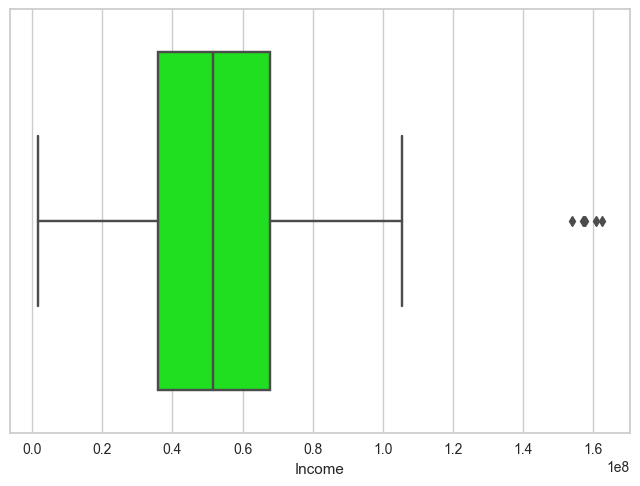

In [218]:
sns.boxplot(x = df['Income'], color= '#00FF00')
plt.show()

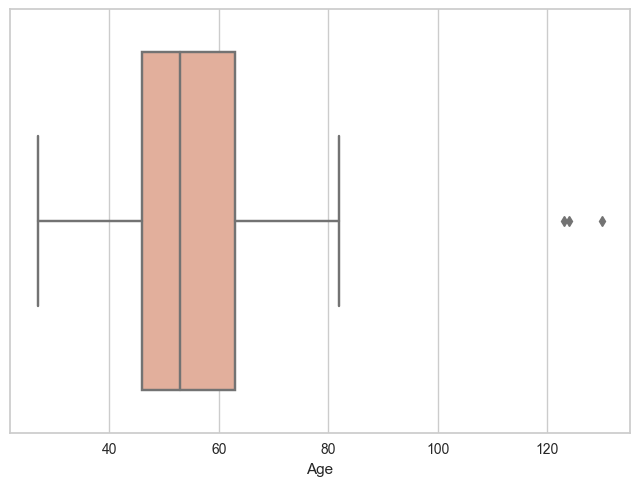

In [219]:
sns.boxplot(x = df['Age'], color= '#eea990')
plt.show()

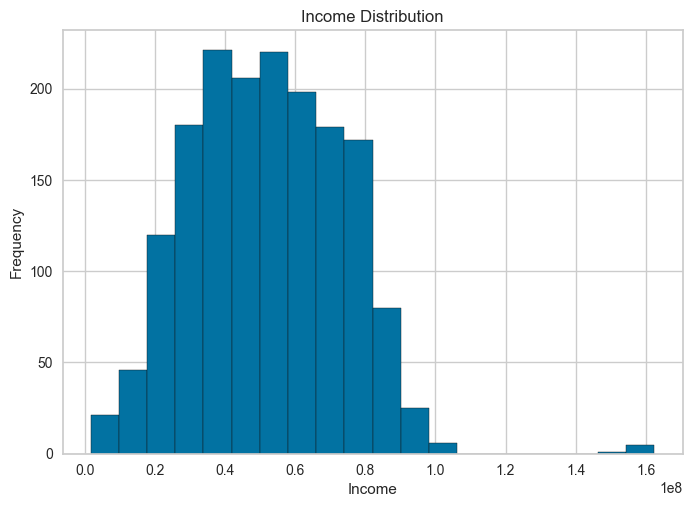

In [220]:
# Plot a histogram of income
plt.hist(df['Income'], bins=20, edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

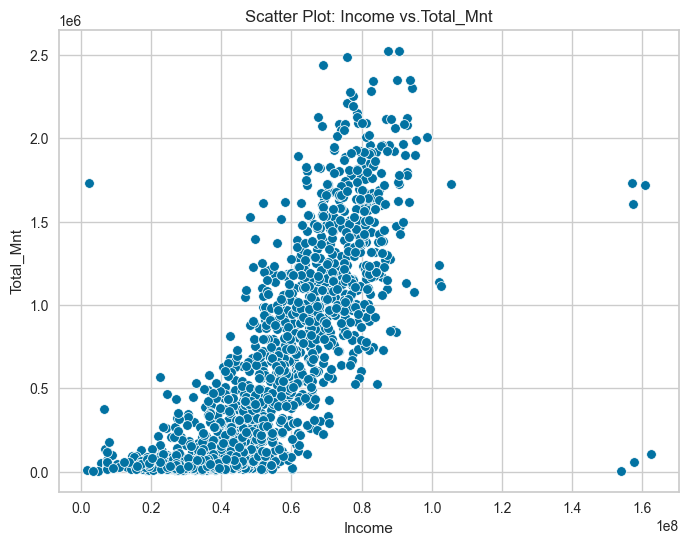

In [221]:
# Scatter Plot: Income vs.Total_Mnt 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Mnt', data=df)
plt.title('Scatter Plot: Income vs.Total_Mnt')
plt.xlabel('Income')
plt.ylabel('Total_Mnt')
plt.show()

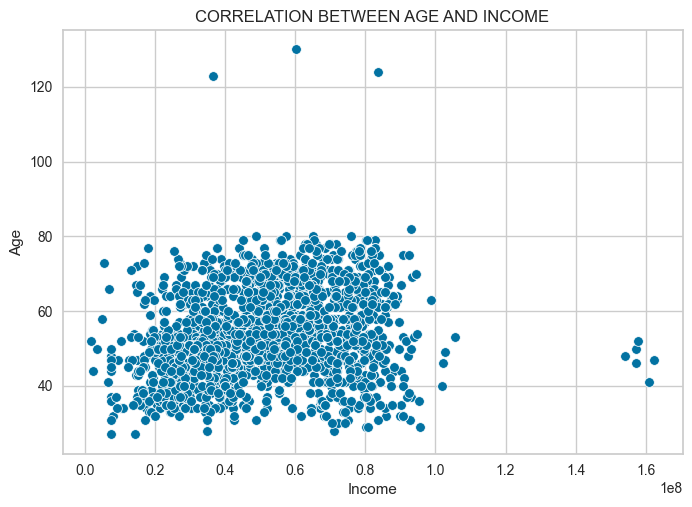

In [162]:
# Scatter Plot: Age vs. income
sns.scatterplot(x='Income', y='Age', data=df3)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("CORRELATION BETWEEN AGE AND INCOME")
plt.show()

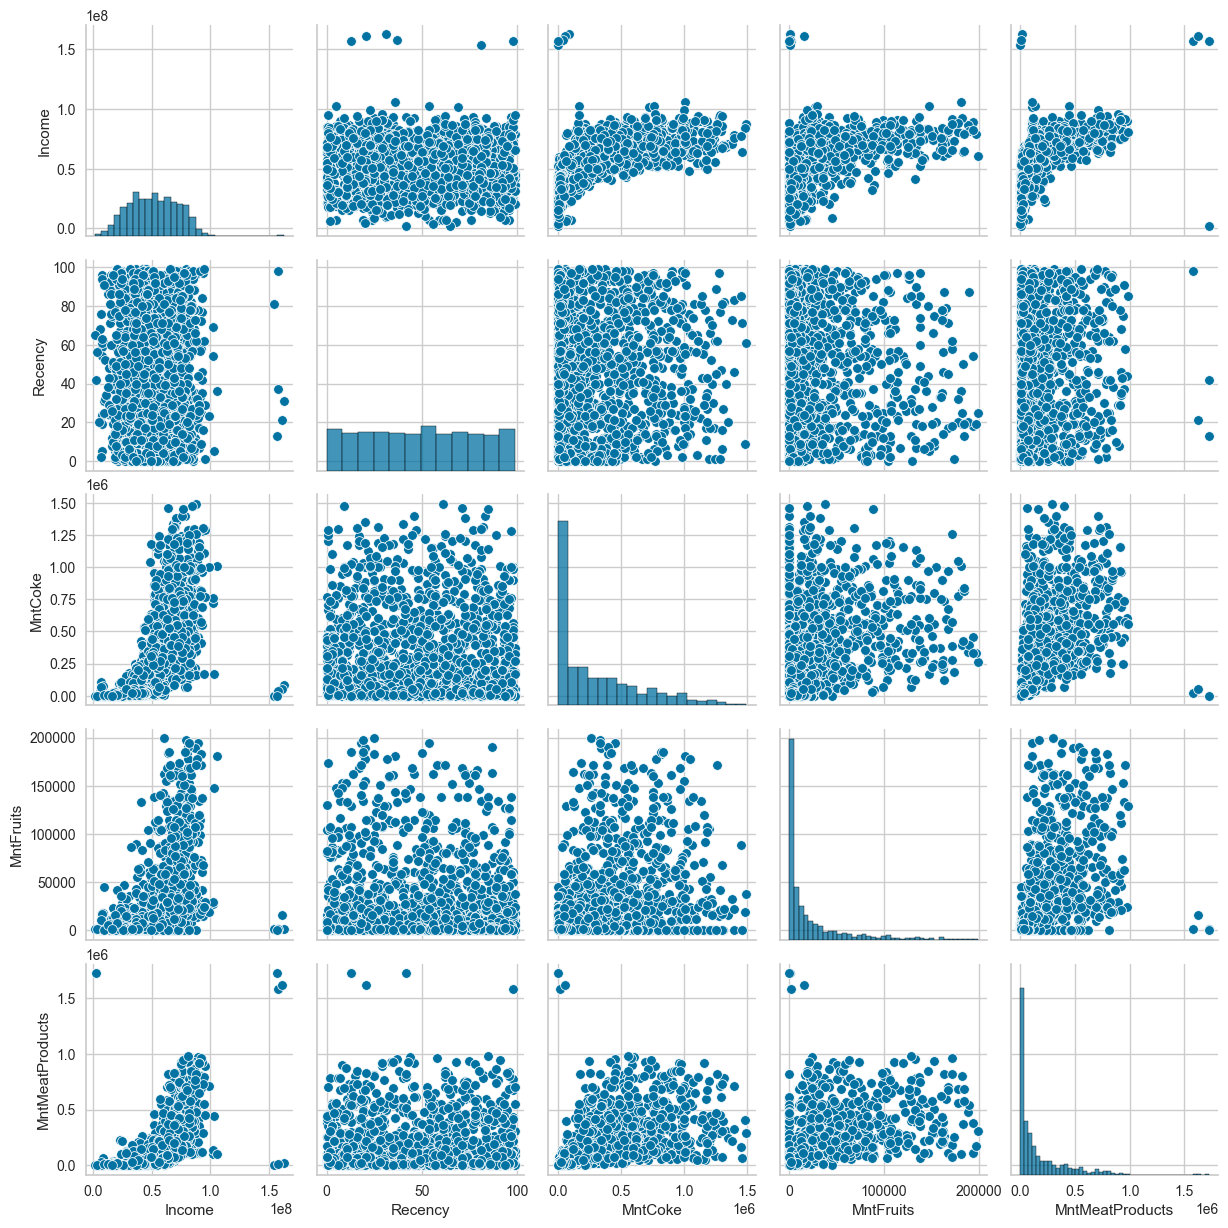

In [222]:
# Create a pairplot
sns.pairplot(df[['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts']])
plt.show()

In [223]:
#Dropping the outliers by setting a cap on Age. 
df = df[(df["Age"]<90)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 1677


<div style="color: green; background-color:white; text-align: left;">
    <h1>Data Preprocessing</h1>
</div>

In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

* Label encoding the categorical features
* Scaling the features using the standard scaler

In [224]:
# encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

col = ['Education','Marital_Status']
for i in col:
    df.loc[:, i] = label_encoder.fit_transform(df[i])
    
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,5524,1957,1,3,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,3,11,1,66,0,1617000,22
1,2174,1954,1,3,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,3,11,0,69,2,27000,4
2,4141,1965,1,1,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,3,11,0,58,0,776000,20
3,6182,1984,1,1,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,3,11,0,39,1,53000,6
4,5324,1981,3,2,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,3,11,0,42,1,422000,14


<Axes: >

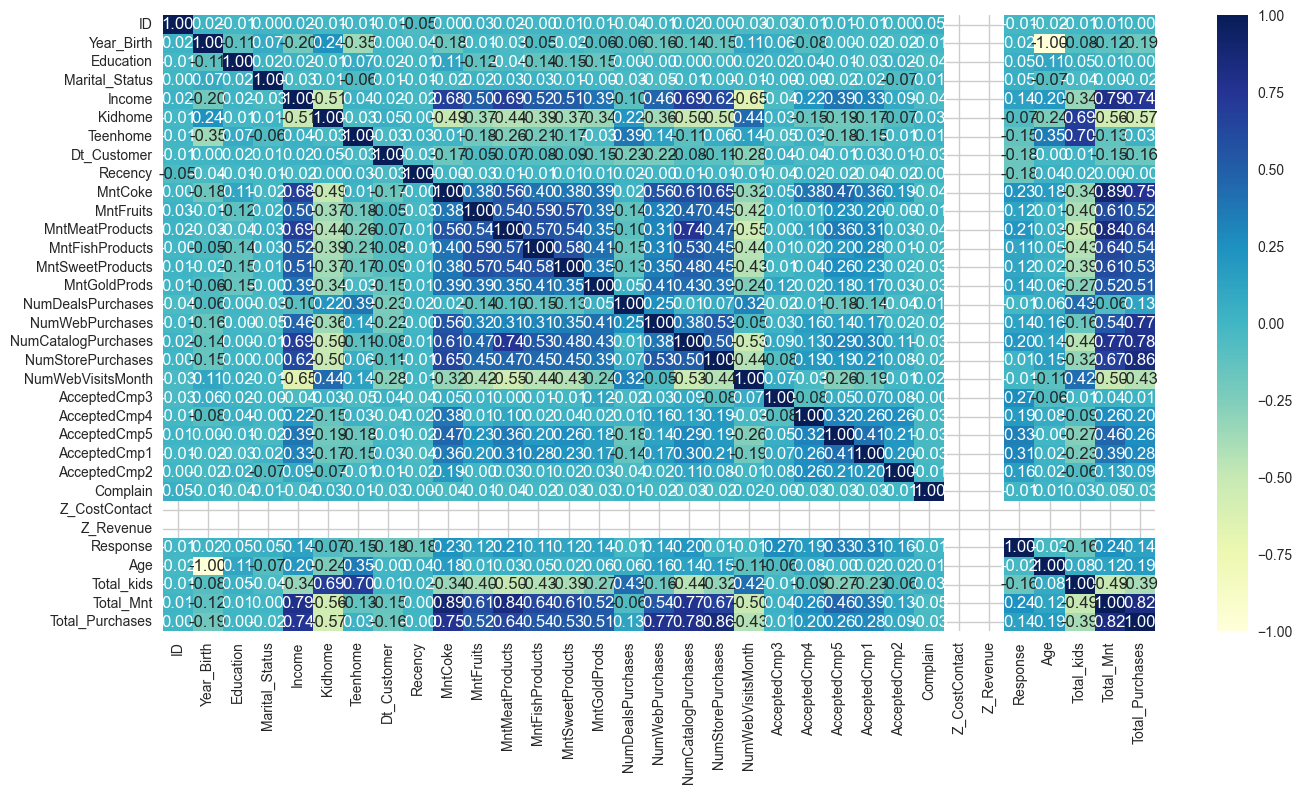

In [225]:
# Create a heatmap of the correlation matrix
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [226]:

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Complain','Response']
df= df.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df1 = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")            
            

All features are now scaled


In [227]:
scaled_df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_kids,Total_Mnt,Total_Purchases
0,-0.007958,-1.028244,-0.579048,1.189710,0.287258,-0.827652,-0.909671,0.308614,0.974724,1.575077,...,1.479648,2.465421,-0.553204,0.679643,0.0,0.0,1.028244,-1.248249,1.685883,1.323553
1,-1.043479,-1.285830,-0.579048,1.189710,-0.264686,1.001034,0.908587,-0.383107,-0.868284,-0.630678,...,-1.138620,-0.562293,-1.169631,-0.137097,0.0,0.0,1.285830,1.371667,-0.959818,-1.186989
2,-0.435458,-0.341349,-0.579048,-0.811437,0.917871,-0.827652,-0.909671,-0.798139,0.357434,0.586290,...,1.479648,-0.225880,1.296078,-0.545468,0.0,0.0,0.341349,-1.248249,0.286490,1.044604
3,0.195437,1.290028,-0.579048,-0.811437,-1.186528,1.001034,-0.909671,-0.798139,-0.868284,-0.554617,...,-0.764582,-0.898705,-0.553204,0.271273,0.0,0.0,-1.290028,0.061709,-0.916555,-0.908040
4,-0.069780,1.032442,1.421083,0.189136,0.294512,1.001034,-0.909671,1.553710,-0.389811,0.434169,...,0.357533,0.110533,0.063223,-0.137097,0.0,0.0,-1.032442,0.061709,-0.302552,0.207756


<div style="color: purple; background-color:white; text-align: left;">
    <h1>Testing Dataset</h1>
</div>

In [171]:
#for test_data
data = pd.read_csv('customer_test.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [172]:
print("Number of datapoints:", len(data))

Number of datapoints: 559


<div style="color: GREEN; background-color:white; text-align: left;">
    <h1>Data Cleaning</h1>
</div>

In [248]:
data.shape

(559, 28)

In [249]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_kids,Total_Mnt,Total_Purchases
count,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000,559.000000,559,559.000000,5.590000e+02,...,559.000000,559.00000,559.000000,559.000000,559.0,559.0,559.000000,559.000000,5.590000e+02,559.000000
mean,1960.000000,1960.000000,5721.500894,1968.663685,5.291597e+07,0.420394,0.525939,2013-07-07 22:01:30.161001728,49.187835,3.003488e+05,...,4.214669,2.62254,5.790698,5.273703,3.0,11.0,54.336315,0.946333,6.097657e+05,12.627907
min,1681.000000,1681.000000,17.000000,1940.000000,4.023000e+06,0.000000,0.000000,2012-08-01 00:00:00,0.000000,0.000000e+00,...,0.000000,0.00000,0.000000,0.000000,3.0,11.0,28.000000,0.000000,8.000000e+03,0.000000
25%,1820.500000,1820.500000,2850.500000,1958.500000,3.438550e+07,0.000000,0.000000,2013-01-12 12:00:00,25.000000,2.300000e+04,...,2.000000,0.00000,3.000000,4.000000,3.0,11.0,46.000000,0.000000,6.800000e+04,6.000000
50%,1960.000000,1960.000000,5631.000000,1970.000000,5.291597e+07,0.000000,1.000000,2013-07-06 00:00:00,49.000000,1.750000e+05,...,4.000000,2.00000,5.000000,6.000000,3.0,11.0,53.000000,1.000000,4.130000e+05,13.000000
75%,2099.500000,2099.500000,8603.500000,1977.000000,6.925400e+07,1.000000,1.000000,2014-01-10 00:00:00,74.000000,5.140000e+05,...,6.000000,4.00000,8.000000,7.000000,3.0,11.0,64.500000,1.000000,1.059500e+06,19.000000
max,2239.000000,2239.000000,11187.000000,1995.000000,6.666660e+08,2.000000,2.000000,2014-06-28 00:00:00,99.000000,1.493000e+06,...,27.000000,11.00000,13.000000,19.000000,3.0,11.0,83.000000,3.000000,2.257000e+06,29.000000
std,161.513673,161.513673,3269.336755,11.867607,3.375894e+07,0.511880,0.527682,NaN,29.109522,3.303610e+05,...,3.074417,2.75569,3.272704,2.357450,0.0,0.0,11.867607,0.716410,6.035638e+05,7.308193


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0.1         559 non-null    int64         
 1   Unnamed: 0           559 non-null    int64         
 2   ID                   559 non-null    int64         
 3   Year_Birth           559 non-null    int64         
 4   Education            559 non-null    object        
 5   Marital_Status       559 non-null    object        
 6   Income               559 non-null    float64       
 7   Kidhome              559 non-null    int64         
 8   Teenhome             559 non-null    int64         
 9   Dt_Customer          559 non-null    datetime64[ns]
 10  Recency              559 non-null    int64         
 11  MntCoke              559 non-null    int64         
 12  MntFruits            559 non-null    int64         
 13  MntMeatProducts      559 non-null  

In [251]:
# Checking if any NaN is present in column or not

data.isna().any()

Unnamed: 0.1           False
Unnamed: 0             False
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Z_CostContact          False
Z_Revenue              False
Age                    False
Total_kids             False
Total_Mnt              False
Total_Purchases        False
dtype: bool

* 1) There are missing values in income column.
* 2) Dt_Customer(date of costumer joined) is not in date time format.

In [252]:
income_column = data['Income']

# Calculate the IQR (Interquartile Range)
Q1 = income_column.quantile(0.25)
Q3 = income_column.quantile(0.75)
IQR = Q3 - Q1

# Define a lower bound and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(income_column < lower_bound) | (income_column > upper_bound)]

# Display only the 'Income' column of the outliers
outlier_incomes = outliers['Income']

# Display the outlier incomes
print("Outliers in the Income column:")
print(outlier_incomes)

Outliers in the Income column:
451    156924000.0
552    666666000.0
Name: Income, dtype: float64


In [230]:
# Remove outliers by filtering the DataFrame
df_no_outliers = data[(income_column >= lower_bound) & (income_column <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers['Income'])

DataFrame without outliers:
0      38232000.0
1      22554000.0
2      23536000.0
3      49413000.0
4      42231000.0
          ...    
554    61223000.0
555    64014000.0
556    56981000.0
557    69245000.0
558    52869000.0
Name: Income, Length: 550, dtype: float64


In [231]:
# Filling the missing value in the income my mean

data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any()

Unnamed: 0.1           False
Unnamed: 0             False
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [232]:
data.Marital_Status.unique()

array(['Bertunangan', 'Menikah', 'Cerai', 'Lajang', 'Janda'], dtype=object)

In [233]:
# use the replace method to convert Indonesian to English
data['Marital_Status'].replace({'Lajang': 'Single', 
                              'Bertunangan': 'Engaged', 
                              'Menikah': 'Married', 
                              'Cerai': ' Divorced', 
                              'Janda': 'Widow', 
                              'Duda': 'Widower'}, inplace=True)

In [234]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Engaged,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Married,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Married,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Married,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Married,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In the next bit, I will be performing the following steps .

1)Creating Age column from Year_Birth column.

2)Creating Total_Kids column from Kidhome and Teenhome columns.

3)Creating Total_Mnt column from MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts and MntGoldProds columns.

4)Creating Total_Purchases column from NumWebPurchases,NumCatalogPurchases and NumStorePurchases columns.

6)Droping some of the redundant features.

In [235]:
# 1)Creating Age column from Year_Birth column.
data["Age"] = 2023 - data["Year_Birth"]

In [236]:
# 2)Creating Total_Kids column from Kidhome and Teenhome columns.
data["Total_kids"] = data["Kidhome"] + data["Teenhome"]

In [237]:
# 3)Total mnt on various items
data["Total_Mnt"] = data["MntCoke"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [238]:
# 4)Creating Total_Purchases column from NumWebPurchases,NumCatalogPurchases and NumStorePurchases columns.
data["Total_Purchases"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

In [239]:
# 5)Droping Z_CostContact,Z_Revenue,ID,Year_Birth,"Unnamed: 0","Unnamed: 0.1".
data.drop(["Z_CostContact","Z_Revenue","ID","Year_Birth","Unnamed: 0","Unnamed: 0.1"],axis=1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,S1,Engaged,38232000.0,1,1,17-01-2014,84,43000,5000,28000,...,0,0,0,0,0,0,52,2,122000,7
1,S3,Married,22554000.0,1,1,03-11-2012,38,27000,0,10000,...,0,0,0,0,0,0,68,2,41000,6
2,S3,Married,23536000.0,1,0,04-06-2014,53,6000,0,3000,...,0,0,0,0,0,0,40,1,10000,3
3,S1,Married,49413000.0,0,1,25-10-2013,88,205000,7000,41000,...,0,0,0,0,0,0,71,1,304000,11
4,S1,Married,42231000.0,1,1,25-03-2014,99,24000,0,8000,...,0,0,0,0,0,0,54,2,37000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,S1,Married,61223000.0,0,1,13-06-2013,46,709000,43000,182000,...,0,0,0,0,0,0,56,1,1341000,16
555,S3,Engaged,64014000.0,2,1,10-06-2014,56,406000,0,30000,...,0,0,1,0,0,0,77,3,444000,15
556,S1,Divorced,56981000.0,0,0,25-01-2014,91,908000,48000,217000,...,1,0,0,0,0,0,42,0,1241000,18
557,S2,Engaged,69245000.0,0,1,24-01-2014,8,428000,30000,214000,...,0,0,0,0,0,0,67,1,843000,21


<div style="color: GREEN; background-color:white; text-align: left;">
    <h1>Data Preprocessing</h1>
</div>

The following steps are applied to preprocess the data:

* Label encoding the categorical features
* Scaling the features using the standard scaler

In [240]:
# encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

col = ['Education','Marital_Status']
for i in col:
    data.loc[:, i] = label_encoder.fit_transform(data[i])
    
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,1681,1681,5939,1971,1,1,38232000.0,1,1,17-01-2014,...,0,0,0,3,11,0,52,2,122000,7
1,1682,1682,2156,1955,3,2,22554000.0,1,1,03-11-2012,...,0,0,0,3,11,0,68,2,41000,6
2,1683,1683,7788,1983,3,2,23536000.0,1,0,04-06-2014,...,0,0,0,3,11,0,40,1,10000,3
3,1684,1684,10323,1952,1,2,49413000.0,0,1,25-10-2013,...,0,0,0,3,11,0,71,1,304000,11
4,1685,1685,7947,1969,1,2,42231000.0,1,1,25-03-2014,...,0,0,0,3,11,0,54,2,37000,4


In [253]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_kids,Total_Mnt,Total_Purchases
0,1681,1681,5939,1971,1,1,38232000.0,1,1,2014-01-17,...,3,1,3,5,3,11,52,2,122000,7
1,1682,1682,2156,1955,3,2,22554000.0,1,1,2012-11-03,...,2,0,4,5,3,11,68,2,41000,6
2,1683,1683,7788,1983,3,2,23536000.0,1,0,2014-06-04,...,0,0,3,3,3,11,40,1,10000,3
3,1684,1684,10323,1952,1,2,49413000.0,0,1,2013-10-25,...,4,2,5,5,3,11,71,1,304000,11
4,1685,1685,7947,1969,1,2,42231000.0,1,1,2014-03-25,...,1,0,3,5,3,11,54,2,37000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2235,2235,10870,1967,1,2,61223000.0,0,1,2013-06-13,...,9,3,4,5,3,11,56,1,1341000,16
555,2236,2236,4001,1946,3,1,64014000.0,2,1,2014-06-10,...,8,2,5,7,3,11,77,3,444000,15
556,2237,2237,7270,1981,1,0,56981000.0,0,0,2014-01-25,...,2,3,13,6,3,11,42,0,1241000,18
557,2238,2238,8235,1956,2,1,69245000.0,0,1,2014-01-24,...,6,5,10,3,3,11,67,1,843000,21


In [254]:
# Dropping columns because they will not contribute anything in model building

data=data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_kids,Total_Mnt,Total_Purchases
0,5939,1971,1,1,38232000.0,1,1,2014-01-17,84,43000,...,3,1,3,5,3,11,52,2,122000,7
1,2156,1955,3,2,22554000.0,1,1,2012-11-03,38,27000,...,2,0,4,5,3,11,68,2,41000,6
2,7788,1983,3,2,23536000.0,1,0,2014-06-04,53,6000,...,0,0,3,3,3,11,40,1,10000,3
3,10323,1952,1,2,49413000.0,0,1,2013-10-25,88,205000,...,4,2,5,5,3,11,71,1,304000,11
4,7947,1969,1,2,42231000.0,1,1,2014-03-25,99,24000,...,1,0,3,5,3,11,54,2,37000,4


In [256]:
data=data.drop(columns=["Dt_Customer"],axis=1)
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(data)
scaled_dt = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


<div style="color: green; background-color:white; text-align: left;">
    <h1>Dimensionality Reduction</h1>
</div>

Principal component analysis (PCA):

 it is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Now we will do Dimensionality Reduction through the method of PCA and will reduce dimensions to 3.

After reduction we will plot it.

In [257]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df1)
PCA_df = pd.DataFrame(pca.transform(scaled_df1), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1677.0,7.626577e-17,2.878809,-5.047595,-2.701875,-0.617400,2.511618,7.444156
col2,1677.0,-1.694795e-17,1.660333,-3.678086,-1.357514,-0.025017,1.250506,5.452214
col3,1677.0,2.542192e-17,1.318141,-3.677026,-0.849869,-0.005572,0.832184,5.105507


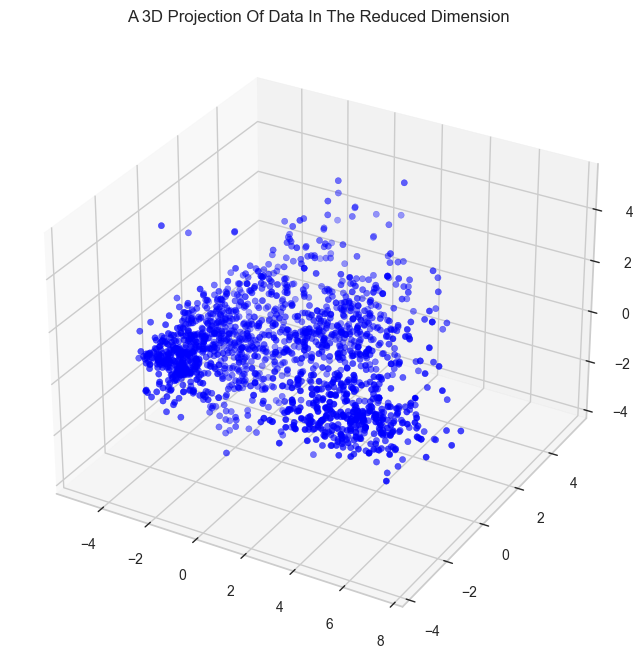

In [258]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<div style="color: green; background-color:white; text-align: left;">
    <h1>Clustering</h1>
</div>

I will do Agglomerative Clustering. The steps are:-

1)Finding right number of cluster through elbow method.

2)Fitting Agglomerative Clustering model.

3)Examining the clusters.

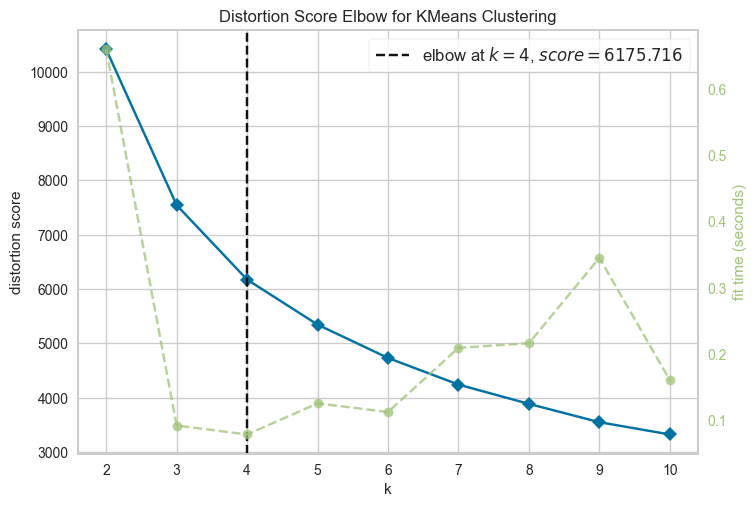

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [259]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

To calculates the silhouette score for a given clustering model and data

In [261]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_df1,Elbow_M.labels_, metric='euclidean')
score

0.10917601100260005

In [262]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
df["Clusters"]=yhat_AC

In [263]:
data_AC = AC.fit_predict(scaled_dt)                    
scaled_dt["Clusters"] = data_AC
data["Clusters"]= data_AC  

In [265]:
score = silhouette_score(scaled_df1,Elbow_M.labels_, metric='euclidean')
score

0.10917601100260005

<div style="color: green; background-color:white; text-align: left;">
    <h1>Classification</h1>
</div>

Now I will do the preduction of the cluster through Random Forest Classification

In [266]:
# traing data
df.shape

(1677, 26)

In [267]:
scaled_df1.shape

(1677, 25)

In [270]:
scaled_df1["Clusters"] = data["Clusters"]
scaled_df1["Clusters"].unique()

array([ 1.,  3.,  0.,  2., nan])

In [272]:
scaled_df1 = scaled_df1.dropna()

In [273]:
scaled_dt["Clusters"] = data["Clusters"]
scaled_dt = scaled_dt.dropna()

In [274]:
target = ["Clusters"]
x_train = scaled_df1.drop(target, axis=1)
y_train = scaled_df1[target]

In [275]:
x_test = scaled_dt.drop(target,axis=1)
y_test = scaled_dt[target]

In [276]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [277]:
model.score(x_train,y_train)

1.0

In [278]:
model.score(x_test,y_test)

0.2182468694096601

<div style="color: green; background-color:white; text-align: left;">
    <h1>Conclusion</h1>
</div>

In conclusion, our customer analysis project has provided valuable insights into customer behavior and preferences, enabling us to make data-driven decisions that can drive business growth and customer engagement. Throughout this project, we performed various data analysis and machine learning techniques to achieve the following key outcomes